In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/student-mat.xlsx")
df.head()

,school,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,paid,activities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,4,4,2,2,0,yes,...,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,1,1,1,2,0,no,...,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,1,1,1,2,3,yes,...,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,15,U,4,2,1,3,0,no,...,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,3,3,1,2,0,no,...,yes,no,no,3,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   Medu        395 non-null    int64 
 5   Fedu        395 non-null    int64 
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    int64 
 9   schoolsup   395 non-null    object
 10  famsup      395 non-null    object
 11  paid        395 non-null    object
 12  activities  395 non-null    object
 13  internet    395 non-null    object
 14  freetime    395 non-null    int64 
 15  goout       395 non-null    int64 
 16  health      395 non-null    int64 
 17  absences    395 non-null    int64 
 18  G1          395 non-null    int64 
 19  G2          395 non-null    int64 
 20  G3        

In [ ]:
df.dtypes

,0
school,object
sex,object
age,int64
address,object
Medu,int64
Fedu,int64
traveltime,int64
studytime,int64
failures,int64
schoolsup,object


In [ ]:
binary_cols = ["schoolsup","famsup","paid","internet","activities"]

for col in binary_cols:
    df[col] = df[col].map({"yes":1,"no":0})

In [ ]:
df = df.drop("school",axis=1)

In [ ]:
df["address"] = df["address"].map({"U":1,"R":0})

In [ ]:
df["sex"] = df["sex"].map({"F":1,"M":0})

In [ ]:
df[['G3','G2', 'G1','studytime','traveltime','paid','famsup','internet','activities','address','sex']].corr()

,G3,G2,G1,studytime,traveltime,paid,famsup,internet,activities,address,sex
G3,1.000000,0.904868,0.801468,0.097820,-0.117142,0.101996,-0.039157,0.098483,0.016100,0.105756,-0.103456
G2,0.904868,1.000000,0.852118,0.135880,-0.153198,0.105198,-0.059166,0.119439,0.050552,0.126037,-0.091099
G1,0.801468,0.852118,1.000000,0.160612,-0.093040,0.039079,-0.084569,0.071619,0.057010,0.069704,-0.091839
studytime,0.097820,0.135880,0.160612,1.000000,-0.100909,0.167220,0.145228,0.059422,0.089877,-0.020912,0.306268
traveltime,-0.117142,-0.153198,-0.093040,-0.100909,1.000000,-0.066420,-0.003286,-0.111302,-0.007766,-0.328096,-0.059722
paid,0.101996,0.105198,0.039079,0.167220,-0.066420,1.000000,0.293184,0.153132,-0.021382,0.052800,0.129126
famsup,-0.039157,-0.059166,-0.084569,0.145228,-0.003286,0.293184,1.000000,0.103581,-0.001500,0.023903,0.151623
internet,0.098483,0.119439,0.071619,0.059422,-0.111302,0.153132,0.103581,1.000000,0.048663,0.216842,-0.044113
activities,0.016100,0.050552,0.057010,0.089877,-0.007766,-0.021382,-0.001500,0.048663,1.000000,-0.051360,-0.099833
address,0.105756,0.126037,0.069704,-0.020912,-0.328096,0.052800,0.023903,0.216842,-0.051360,1.000000,0.028504


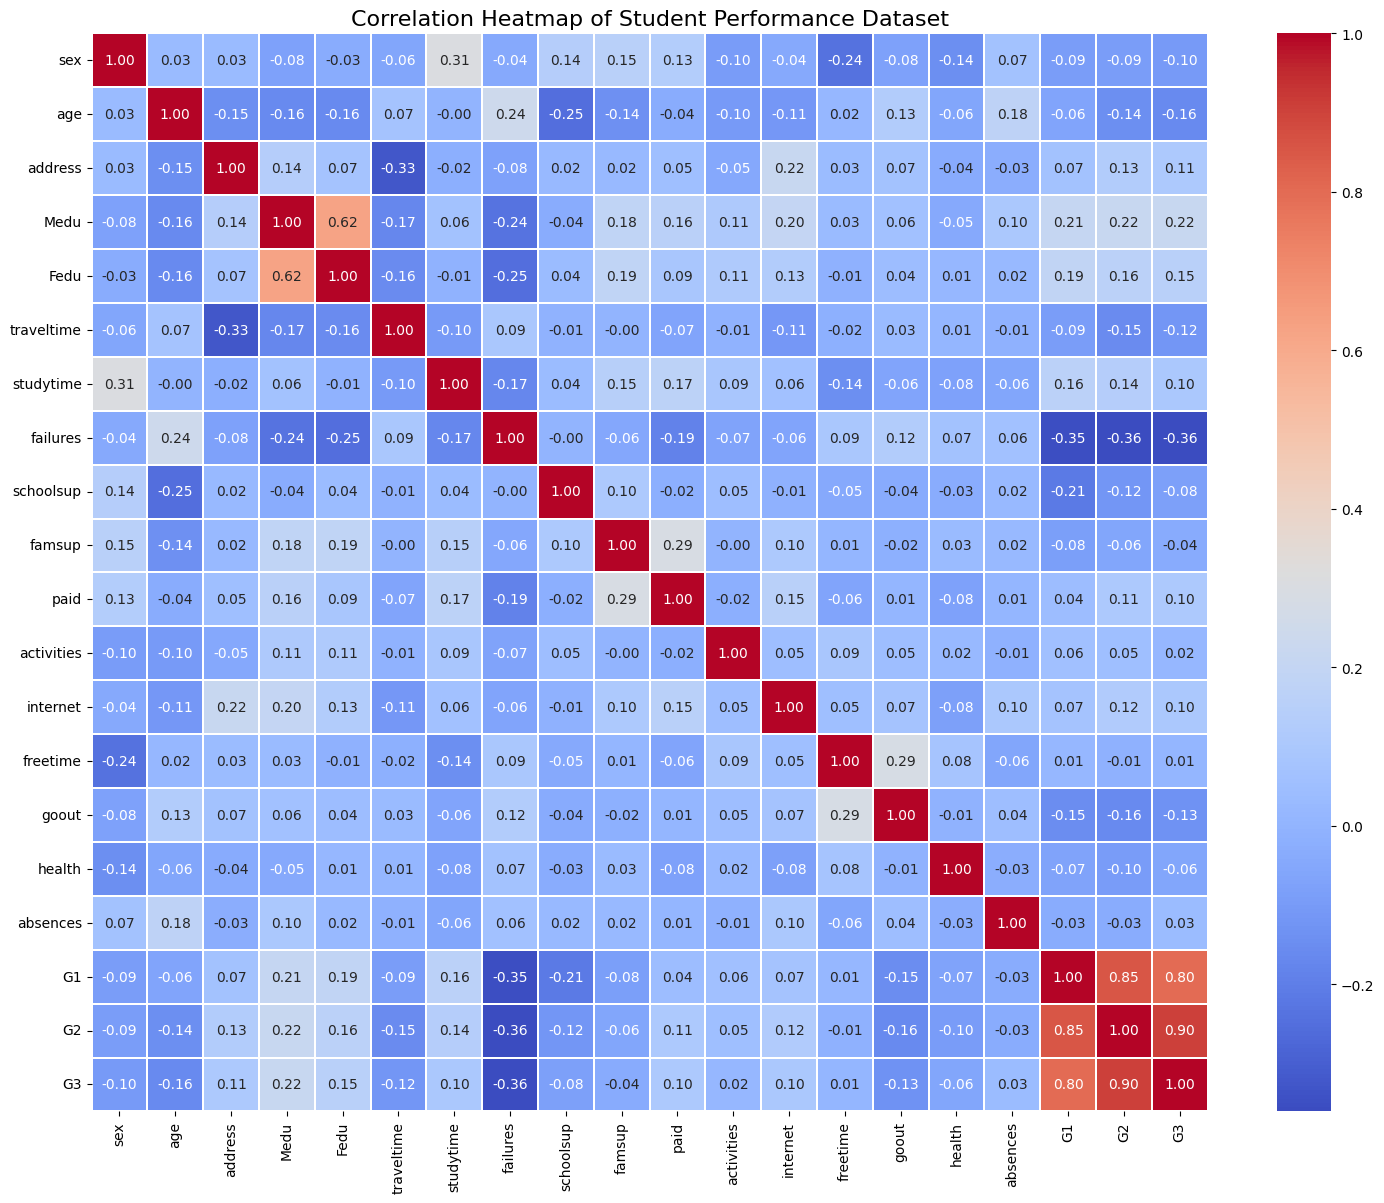

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,14))

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.3
)

plt.title("Correlation Heatmap of Student Performance Dataset", fontsize=16)
plt.show()

Looking at the correlation matrix, it becomes clear that a student’s past academic performance plays the biggest role in predicting final grades. Both G2 (second period marks) and G1 (first period marks) show a strong positive relationship with G3 (final grade). This makes intuitive sense, students who perform well earlier in the semester are much more likely to do well at the end.

**Study time shows a small but positive correlation with final grades, suggesting that putting in more effort does help**, although its impact is not as strong as previous exam scores. On the other hand, **travel time to school has a slight negative effect, indicating that longer commutes may subtly affect academic performance**.

Interestingly, features such as paid classes, family support, internet access, extracurricular activities, school type, address, and gender show very weak correlations with final grades. This suggests that, in this dataset, academic outcomes are influenced far more by individual performance and study habits than by background or demographic factors.

**Key takeaway:**

The strongest predictors of final performance are G1 and G2, supported by behavioral factors like study time and attendance. Based on this insight, we prioritize these academic and habit-related features in our model and agent simulation, keeping the system focused, interpretable, and fair.

# **MODEL TRAINING**

In [ ]:
features = [
    "sex","age","address","Medu","Fedu","traveltime","studytime",
    "failures","schoolsup","famsup","paid","activities","internet",
    "freetime","goout","health","absences","G1","G2"
]

X = df[features]
y = df["G3"]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Target
y = df["G3"]

# Features
X = df.drop("G3", axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.1,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=0.75,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

rmse_sgpa = (rmse / 20) * 10
rmse_percent = (rmse / 20) * 100

print("RMSE (marks):", round(rmse,2))
print("RMSE (SGPA):", round(rmse_sgpa,2))
print("RMSE (%):", round(rmse_percent,2))
print("R2:", round(r2,3))

RMSE (marks): 1.78
RMSE (SGPA): 0.89
RMSE (%): 8.91
R2: 0.845


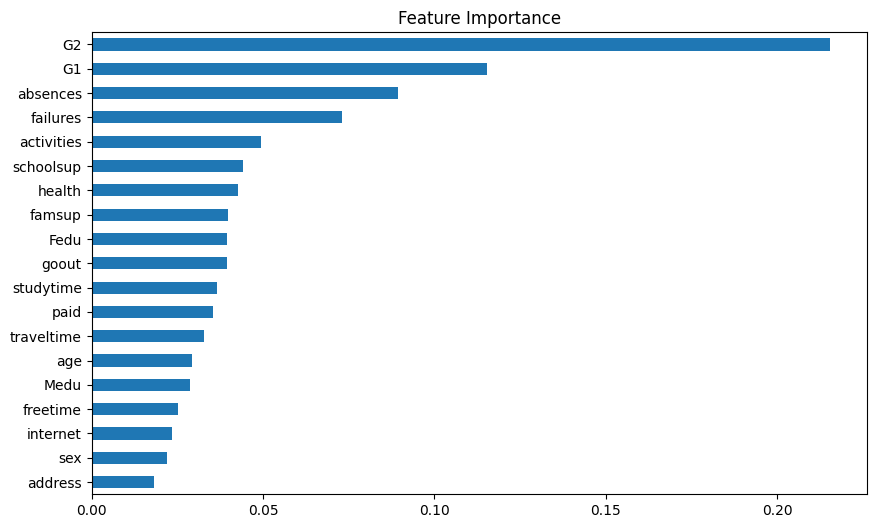

In [ ]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values()

importance.plot(kind="barh", figsize=(10,6))
plt.title("Feature Importance")
plt.show()

In [ ]:
# Save model
joblib.dump(model,"/content/drive/MyDrive/model.pkl")

# Save exact feature list
joblib.dump(X.columns.tolist(),"/content/drive/MyDrive/features.pkl")

# Save processed dataset
df.to_csv("/content/drive/MyDrive/processed_data.csv", index=False)

print("model.pkl, features.pkl, processed_data.csv saved")

model.pkl, features.pkl, processed_data.csv saved
